In [9]:
# Python program to illustrate HoughLine
# method for line detection
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show3Images(img1, img2, img3):
    plt.subplot(131),plt.imshow(img1,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(img2,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(img3,cmap = 'gray')
    plt.title('Line Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [2]:
# Reading the required image in
# which operations are to be done.
# Make sure that the image is in the same
# directory in which this python program is
img = cv2.imread('casa.webp')
# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply edge detection method on the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# The below for loop runs till r and theta values
# are in the range of the 2d array
for r_theta in lines:
	arr = np.array(r_theta[0], dtype=np.float64)
	r, theta = arr
	# Stores the value of cos(theta) in a
	a = np.cos(theta)
	# Stores the value of sin(theta) in b
	b = np.sin(theta)
	# x0 stores the value rcos(theta)
	x0 = a*r
	# y0 stores the value rsin(theta)
	y0 = b*r
	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
	x1 = int(x0 + 1000*(-b))
	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
	y1 = int(y0 + 1000*(a))
	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
	x2 = int(x0 - 1000*(-b))
	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
	y2 = int(y0 - 1000*(a))
	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
	# (0,0,255) denotes the colour of the line to be
	# drawn. In this case, it is red.
	cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# All the changes made in the input image are finally
# written on a new image houghlines.jpg
cv2.imwrite('linesDetected.jpg', img)


True

In [43]:
sample_path="tgs_salt/1bd1c8c771.png"
mask_path  ="tgs_salt/1bd1c8c771Mask.png"

original = cv2.imread(sample_path)


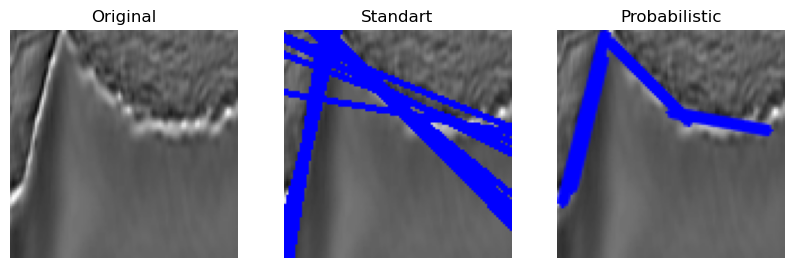

In [70]:
houghLines  = original.copy()
probabLines = original.copy()

edges = cv2.Canny(original,100,200)

# Hough Line Transform
lines  = cv2.HoughLines(edges, 1, np.pi/180, 30)
# Probabilistic Line Transform
#linesP =cv2.HoughLinesP(edges,rho resolut pxls , theta radians  , tresh itersections, lines, min pnts, max gap pnts)
linesP = cv2.HoughLinesP(edges,      1          ,  np.pi / 180   ,       30          , None ,   20    ,      5     )

# Draw the standart lines
if lines is not None:
	for r_theta in lines:
		arr = np.array(r_theta[0], dtype=np.float64)
		r, theta = arr
		a = np.cos(theta)
		b = np.sin(theta)
		x0 = a*r
		y0 = b*r
		x1 = int(x0 + 1000*(-b))
		y1 = int(y0 + 1000*(a))
		x2 = int(x0 - 1000*(-b))
		y2 = int(y0 - 1000*(a))
		cv2.line(houghLines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Draw the probabilistic lines
if linesP is not None:
	for i in range(0, len(linesP)):
		l = linesP[i][0]
		cv2.line(probabLines, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


show3Images(original, houghLines, probabLines)

In [57]:
def show3Images(original, standart, probabilistic):
    # plt imshow 3 columns
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(original,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(132),plt.imshow(standart,cmap = 'gray')
    plt.title('Standart'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(133),plt.imshow(probabilistic,cmap = 'gray')
    plt.title('Probabilistic'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.show()

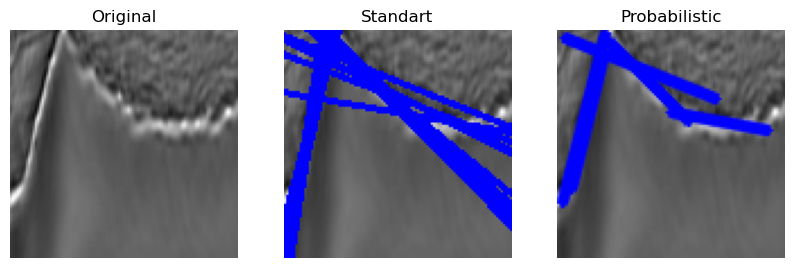

In [55]:
def show3Images(original, standart, probabilistic):
    # plt imshow 3 columns
    plt.figure(figsize=(10,10))
    plt.subplot(131),plt.imshow(original,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(132),plt.imshow(standart,cmap = 'gray')
    plt.title('Standart'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.subplot(133),plt.imshow(probabilistic,cmap = 'gray')
    plt.title('Probabilistic'), plt.xticks([]), plt.yticks([])
    plt.axis('off')
    plt.show()

In [71]:
linesP.shape

(4, 1, 4)

In [72]:
linesP

array([[[ 6, 70, 20, 12]],

       [[ 2, 76, 21,  1]],

       [[23,  5, 58, 40]],

       [[50, 36, 93, 44]]], dtype=int32)